<a href="https://colab.research.google.com/github/pedroogaab/AI-Alorithms/blob/main/ac1/AC1_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [1]:
# TODO: RA & Name
print('210199: ' + 'Pedro Gabriel dos Santos')

210199: Pedro Gabriel dos Santos


## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import seaborn as sns

import pandas as pd


In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/ac1_inteligencia_artificial/data/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/ac1_inteligencia_artificial/data/train.csv")
print(df_test.dtypes, df_train.dtypes)

avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [5]:
display(df_test[['binnedinc', 'geography']])
display(df_train[['binnedinc', 'geography']])

,binnedinc,geography
0,"(54545.6, 61494.5]","Fillmore County, Nebraska"
1,"(45201, 48021.6]","St. Joseph County, Indiana"
2,"(51046.4, 54545.6]","Midland County, Michigan"
3,"(51046.4, 54545.6]","Franklin County, Massachusetts"
4,"(40362.7, 42724.4]","Hocking County, Ohio"
...,...,...
300,"(51046.4, 54545.6]","Livingston County, Illinois"
301,"(48021.6, 51046.4]","Gage County, Nebraska"
302,"(61494.5, 125635]","Broomfield County, Colorado"
303,"(45201, 48021.6]","Winnebago County, Illinois"


,binnedinc,geography
0,"(37413.8, 40362.7]","Mineral County, West Virginia"
1,"(51046.4, 54545.6]","Muscatine County, Iowa"
2,"(54545.6, 61494.5]","Monroe County, Michigan"
3,"(40362.7, 42724.4]","Bland County, Virginia"
4,"(45201, 48021.6]","Steuben County, New York"
...,...,...
2737,"(51046.4, 54545.6]","Walsh County, North Dakota"
2738,"(54545.6, 61494.5]","Lake County, Ohio"
2739,"(61494.5, 125635]","Nantucket County, Massachusetts"
2740,"(45201, 48021.6]","Atchison County, Missouri"


In [6]:
df = pd.concat([df_train['geography'], df_test['geography']]).unique()

In [7]:
le = LabelEncoder()
le.fit(df)

df_train['geography'] = le.transform(df_train['geography'])
df_test['geography'] = le.transform(df_test['geography'])


In [8]:
def mean_value(interval_str):

    interval_str = str(interval_str).strip()
    clean_str = interval_str.replace("(", "").replace(")", "").replace("[", "").replace("]", "").replace(" ", "")

    parts = clean_str.split(",")
    if len(parts) == 2 and parts[0] and parts[1]:
        lower = float(parts[0])
        upper = float(parts[1])
        return (lower + upper) / 2

    clean_str = ''.join(c for c in clean_str if c.isdigit() or c == '.')
    if clean_str:
        return float(clean_str)

    import numpy as np

df_train['binnedinc'] = df_train['binnedinc'].apply(mean_value)
df_test['binnedinc'] = df_test['binnedinc'].apply(mean_value)


In [9]:
display(df_test[['binnedinc', 'geography']])
display(df_train[['binnedinc', 'geography']])

,binnedinc,geography
0,58020.05,891
1,46611.30,2575
2,52796.00,1846
3,52796.00,927
4,41543.55,1229
...,...,...
300,52796.00,1630
301,49534.00,963
302,93564.75,271
303,46611.30,2985


,binnedinc,geography
0,38888.25,1861
1,52796.00,1959
2,58020.05,1891
3,41543.55,210
4,46611.30,2609
...,...,...
2737,52796.00,2829
2738,58020.05,1506
2739,93564.75,1967
2740,46611.30,95


In [10]:
df_test = df_test.dropna()
df_train = df_train.dropna()
df = pd.concat([df_test,df_train],axis=0)

In [11]:
print(df.dtypes)
display(df)


avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                  float64
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                    int64
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
2,436.0,160,438.7,51629,83632,11.9,0.000000,52796.00,40.9,39.7,...,53.6,31.9,13.4,93.654932,1.381182,2.330671,0.611069,55.876491,5.762837,154.4
3,387.0,149,413.9,53953,70601,12.0,84.984632,52796.00,45.1,43.8,...,50.4,40.1,19.0,93.884235,1.295963,1.626279,0.833521,44.848023,3.458754,153.9
20,49.0,20,456.2,55925,8269,9.9,0.000000,58020.05,44.1,43.5,...,51.6,31.5,13.7,98.087726,0.561731,0.095614,0.239034,60.211800,7.888631,177.2
29,29.0,11,459.6,57148,3999,10.5,0.000000,58020.05,46.1,46.6,...,50.8,26.6,10.9,97.212544,0.124440,0.398208,0.522648,59.583859,4.337051,162.6
37,345.0,138,531.7,34678,60094,24.7,0.000000,35815.95,38.5,37.8,...,34.0,43.8,27.7,97.201720,0.863584,0.557313,0.100417,51.636160,5.760011,216.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,208.0,87,382.1,46336,40946,15.5,73.267230,46611.30,44.2,42.4,...,29.7,42.8,24.0,92.581159,0.646821,0.438564,3.192454,54.413168,3.819022,151.4
2717,39.0,13,440.9,56791,6585,9.6,0.000000,58020.05,40.8,39.5,...,46.3,27.8,10.6,98.121851,0.152695,0.320660,0.488624,55.222262,12.761194,136.4
2719,187.0,79,414.6,38989,38033,19.9,0.000000,38888.25,39.0,38.5,...,40.3,40.2,20.2,71.564816,6.694138,0.904473,0.251387,48.967636,5.803003,170.7
2727,891.0,332,483.9,52711,169546,12.1,176.943130,52796.00,37.7,37.1,...,57.4,29.3,15.1,92.544555,2.041372,2.425978,0.766846,47.643569,4.928896,172.9


In [12]:
X = df.drop('target_deathrate', axis=1)
y = df['target_deathrate']
print(X.shape, y.shape)
display(X)
display(y)

(591, 33) (591,)


,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2,436.0,160,438.7,51629,83632,11.9,0.000000,52796.00,40.9,39.7,...,58.6,53.6,31.9,13.4,93.654932,1.381182,2.330671,0.611069,55.876491,5.762837
3,387.0,149,413.9,53953,70601,12.0,84.984632,52796.00,45.1,43.8,...,55.2,50.4,40.1,19.0,93.884235,1.295963,1.626279,0.833521,44.848023,3.458754
20,49.0,20,456.2,55925,8269,9.9,0.000000,58020.05,44.1,43.5,...,59.7,51.6,31.5,13.7,98.087726,0.561731,0.095614,0.239034,60.211800,7.888631
29,29.0,11,459.6,57148,3999,10.5,0.000000,58020.05,46.1,46.6,...,65.3,50.8,26.6,10.9,97.212544,0.124440,0.398208,0.522648,59.583859,4.337051
37,345.0,138,531.7,34678,60094,24.7,0.000000,35815.95,38.5,37.8,...,40.6,34.0,43.8,27.7,97.201720,0.863584,0.557313,0.100417,51.636160,5.760011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,208.0,87,382.1,46336,40946,15.5,73.267230,46611.30,44.2,42.4,...,37.2,29.7,42.8,24.0,92.581159,0.646821,0.438564,3.192454,54.413168,3.819022
2717,39.0,13,440.9,56791,6585,9.6,0.000000,58020.05,40.8,39.5,...,60.1,46.3,27.8,10.6,98.121851,0.152695,0.320660,0.488624,55.222262,12.761194
2719,187.0,79,414.6,38989,38033,19.9,0.000000,38888.25,39.0,38.5,...,46.0,40.3,40.2,20.2,71.564816,6.694138,0.904473,0.251387,48.967636,5.803003
2727,891.0,332,483.9,52711,169546,12.1,176.943130,52796.00,37.7,37.1,...,62.2,57.4,29.3,15.1,92.544555,2.041372,2.425978,0.766846,47.643569,4.928896


,target_deathrate
2,154.4
3,153.9
20,177.2
29,162.6
37,216.7
...,...
2714,151.4
2717,136.4
2719,170.7
2727,172.9


In [13]:
X_train = df_train.drop('target_deathrate', axis=1)
y_train = df_train['target_deathrate']

X_test = df_test.drop('target_deathrate', axis=1)
y_test = df_test['target_deathrate']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(534, 33) (534,)
(57, 33) (57,)


In [14]:
display(X_train)
display(y_train)

display(X_test)
display(y_test)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,170.000000,76,456.600000,40012,27451,16.1,0.000000,38888.25,43.2,42.1,...,45.1,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231
8,121.000000,47,414.200000,47041,19836,13.8,0.000000,46611.30,44.9,43.7,...,50.6,42.0,32.4,16.0,78.050028,6.972224,0.383651,12.844647,57.849630,5.642384
16,188.000000,90,436.300000,32889,47774,29.7,0.000000,28429.05,27.4,26.2,...,51.5,45.7,30.3,17.9,54.362289,40.898435,1.790957,1.055989,37.253189,4.279213
18,1624.000000,584,505.500000,54208,274219,15.1,43.760644,52796.00,40.6,38.9,...,49.9,45.3,33.4,17.7,67.144922,15.563811,8.286488,5.106836,44.805437,4.696613
19,1962.667684,6,453.549422,49852,2825,9.7,0.000000,49534.00,42.2,40.6,...,56.8,44.8,33.5,10.7,95.417114,0.000000,0.179019,0.465449,51.649236,7.558140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,208.000000,87,382.100000,46336,40946,15.5,73.267230,46611.30,44.2,42.4,...,37.2,29.7,42.8,24.0,92.581159,0.646821,0.438564,3.192454,54.413168,3.819022
2717,39.000000,13,440.900000,56791,6585,9.6,0.000000,58020.05,40.8,39.5,...,60.1,46.3,27.8,10.6,98.121851,0.152695,0.320660,0.488624,55.222262,12.761194
2719,187.000000,79,414.600000,38989,38033,19.9,0.000000,38888.25,39.0,38.5,...,46.0,40.3,40.2,20.2,71.564816,6.694138,0.904473,0.251387,48.967636,5.803003
2727,891.000000,332,483.900000,52711,169546,12.1,176.943130,52796.00,37.7,37.1,...,62.2,57.4,29.3,15.1,92.544555,2.041372,2.425978,0.766846,47.643569,4.928896


,target_deathrate
0,198.4
8,148.2
16,205.7
18,179.5
19,129.1
...,...
2714,151.4
2717,136.4
2719,170.7
2727,172.9


,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2,436.000000,160,438.700000,51629,83632,11.9,0.000000,52796.00,40.9,39.7,...,58.6,53.6,31.9,13.4,93.654932,1.381182,2.330671,0.611069,55.876491,5.762837
3,387.000000,149,413.900000,53953,70601,12.0,84.984632,52796.00,45.1,43.8,...,55.2,50.4,40.1,19.0,93.884235,1.295963,1.626279,0.833521,44.848023,3.458754
20,49.000000,20,456.200000,55925,8269,9.9,0.000000,58020.05,44.1,43.5,...,59.7,51.6,31.5,13.7,98.087726,0.561731,0.095614,0.239034,60.211800,7.888631
29,29.000000,11,459.600000,57148,3999,10.5,0.000000,58020.05,46.1,46.6,...,65.3,50.8,26.6,10.9,97.212544,0.124440,0.398208,0.522648,59.583859,4.337051
37,345.000000,138,531.700000,34678,60094,24.7,0.000000,35815.95,38.5,37.8,...,40.6,34.0,43.8,27.7,97.201720,0.863584,0.557313,0.100417,51.636160,5.760011
38,82.000000,34,538.700000,36255,11854,20.3,0.000000,35815.95,43.5,41.0,...,43.2,34.3,40.9,23.6,94.264903,1.599129,1.942398,1.013061,54.159593,4.558177
41,1962.667684,23,453.549422,43674,8803,17.8,0.000000,43962.70,42.5,41.5,...,41.3,34.5,45.2,25.8,86.768739,0.251371,0.422761,0.045704,55.393001,7.495430
47,38.000000,14,450.800000,51040,6409,11.5,0.000000,49534.00,43.3,40.7,...,62.0,54.4,29.8,11.5,98.062077,0.110288,0.236332,0.189066,56.914062,10.270701
49,169.000000,50,536.100000,44653,31408,18.6,0.000000,43962.70,36.0,35.5,...,50.9,40.6,28.9,15.4,94.644416,2.263834,0.278128,0.417192,50.838896,3.509434
55,32.000000,12,462.900000,39342,6753,29.9,0.000000,38888.25,31.0,31.2,...,38.1,30.4,42.4,30.8,42.714160,0.000000,0.073594,0.647630,42.412281,9.492754


,target_deathrate
2,154.4
3,153.9
20,177.2
29,162.6
37,216.7
38,217.1
41,184.9
47,155.2
49,158.1
55,169.9


In [15]:
sk_model_LR = LinearRegression()
sk_model_LR.fit(X_train, y_train)

LinearRegression()

In [19]:
Y_pred_sk = sk_model_LR.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, Y_pred_sk)
mae = mean_absolute_error(y_test, Y_pred_sk)
r2 = r2_score(y_test, Y_pred_sk)

In [52]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 325.9904785269964
Mean Absolute Error (MAE): 13.667272365650039
R² Score: 0.4481181470330371


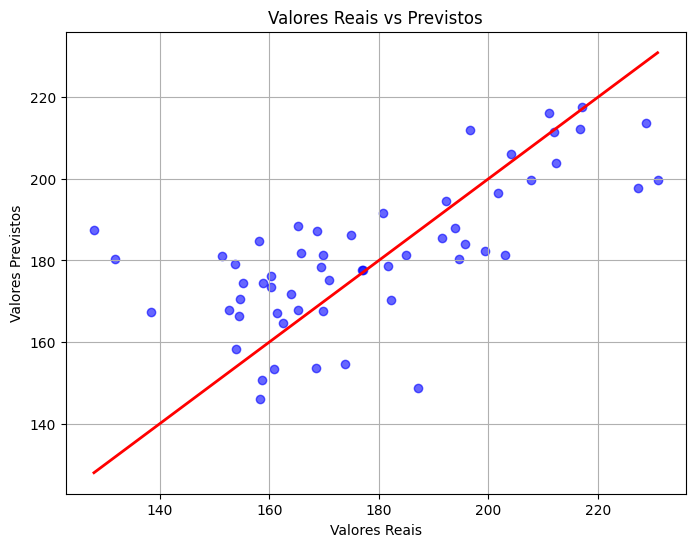

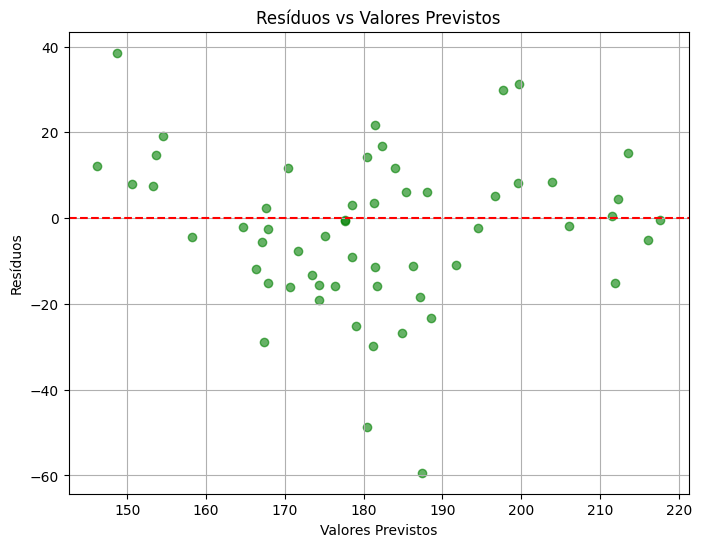

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred_sk, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # linha de identidade
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.grid(True)
plt.show()

# Gráfico de resíduos
residuals = y_test - Y_pred_sk
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred_sk, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




*Coloque sua resposta aqui ...*

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


## Conclusões Atividades 2 e 3

Quais são as conclusões? (1-2 parágrafos)


*Coloque sua resposta aqui ...*

## Resultados com o Conjunto de Dados de Teste


In [16]:
# seu codigo

In [17]:
# Linear Model with SDGRegressor


In [18]:
# Polynomial model with SDGRegressor


## Prazo

Terça-feira, 01 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

02 de abril, 23h59: nota * 0,75
03 de abril, 23h59: nota * 0,5
04 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.